#IS 470 3

---

# Regressions and BlackBox Methods


## Part 1. Classification with BartRider data <br>
You have been given a data file by the San Francisco Bay Area Rapid Transit (BART), which identifies a set of demographics for residents in a local area. We will use this file to determine if a resident is a rider.
<br><br>
VARIABLE DESCRIPTIONS:<br>
<br>
Age:  

            1.   14 thru 17
            2.   18 thru 24
            3.   25 thru 34
            4.   35 thru 44
            5.   45 thru 54
            6.   55 thru 64
            7.   65 and Over

DistToWork: Distance to work in miles<br>
DualInc: Is dual income household or not<br>
Education:  
            
            1. Grade 8 or less<br>
            2. Grades 9 to 11<br>
            3. Graduated high school<br>
            4. 1 to 3 years of college<br>
            5. College graduate<br>
            6. Grad Study<br>
Gender:	M or F<br>
Income: 
        
            1. Less than $10,000<br>
            2. $10,000 to $14,999<br>
            3. $15,000 to $19,999<br>
            4. $20,000 to $24,999<br>
            5. $25,000 to $29,999<br>
            6. $30,000 to $39,999<br>
            7. $40,000 to $49,999<br>
            8. $50,000 to $74,999<br>
            9. $75,000 or more<br>
Language:	Language spoken at home<br>
NbrInHouseHold:	Number in household<br>
NbrInHouseholdUnder18:	Number in household under 18 years old<br>
OwnRent:	Own, rent, or live with parents<br>
YrsInArea:	Years lived in bay area<br>
Rider:	No, Non-rider; Yes, Rider<br>
<br>
**Target variable: Rider**

### 1.Upload and clean data

In [ ]:
# Upload data
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving BartRider.csv to BartRider (2).csv
User uploaded file "BartRider.csv" with length 199121 bytes


In [ ]:
# Import libraries
! pip install regressors
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import linear_model
from regressors import stats
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Read data
BartRider = pd.read_csv('BartRider.csv')
BartRider

,Age,DistToWork,DualInc,Education,Gender,Income,Language,NbrInHouseHold,NbrInHouseholdUnder18,OwnRent,YrsInArea,Rider
0,7,14,N,3,F,3,English,1,0,Rent,5,Yes
1,7,10,N,5,M,8,English,2,0,Own,5,No
2,3,9,N,3,M,1,English,1,0,Rent,5,Yes
3,1,13,N,2,M,1,English,5,3,Parent,5,Yes
4,3,14,N,5,F,2,English,3,1,Parent,5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
5488,3,11,Y,4,M,5,English,2,0,Own,5,Yes
5489,4,9,Y,3,F,6,English,3,1,Rent,2,Yes
5490,2,7,N,4,M,2,English,1,1,Rent,1,Yes
5491,3,7,Y,3,F,9,English,2,0,Own,5,No


In [ ]:
# Examine the number of rows and cols
BartRider.shape

(5493, 12)

In [ ]:
# Examine variable type
BartRider.dtypes

Age                       int64
DistToWork                int64
DualInc                  object
Education                 int64
Gender                   object
Income                    int64
Language                 object
NbrInHouseHold            int64
NbrInHouseholdUnder18     int64
OwnRent                  object
YrsInArea                 int64
Rider                    object
dtype: object

In [ ]:
# Change categorical variables to "category"
BartRider['DualInc'] = BartRider['DualInc'].astype('category')
BartRider['Gender'] = BartRider['Gender'].astype('category')
BartRider['Language'] = BartRider['Language'].astype('category')
BartRider['OwnRent'] = BartRider['OwnRent'].astype('category')
BartRider['Rider'] = BartRider['Rider'].astype('category')

In [ ]:
# Examine variable type again
BartRider.dtypes

Age                         int64
DistToWork                  int64
DualInc                  category
Education                   int64
Gender                   category
Income                      int64
Language                 category
NbrInHouseHold              int64
NbrInHouseholdUnder18       int64
OwnRent                  category
YrsInArea                   int64
Rider                    category
dtype: object

### 2.Data partitioning and inspection code (7 points)

In [ ]:
# Create dummy variables for DualInc, Gender, Language, and OwnRent	(1 points)
BartRider = pd.get_dummies(BartRider, columns=['DualInc','Gender','Language', 'OwnRent'], drop_first=True)
BartRider

,Age,DistToWork,Education,Income,NbrInHouseHold,NbrInHouseholdUnder18,YrsInArea,Rider,DualInc_Y,Gender_M,Language_Other,Language_Spanish,OwnRent_Parent,OwnRent_Rent
0,7,14,3,3,1,0,5,Yes,0,0,0,0,0,1
1,7,10,5,8,2,0,5,No,0,1,0,0,0,0
2,3,9,3,1,1,0,5,Yes,0,1,0,0,0,1
3,1,13,2,1,5,3,5,Yes,0,1,0,0,1,0
4,3,14,5,2,3,1,5,Yes,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5488,3,11,4,5,2,0,5,Yes,1,1,0,0,0,0
5489,4,9,3,6,3,1,2,Yes,1,0,0,0,0,1
5490,2,7,4,2,1,1,1,Yes,0,1,0,0,0,1
5491,3,7,3,9,2,0,5,No,1,0,0,0,0,0


In [ ]:
# Define target variable and predictors (1 point)
target = BartRider['Rider']
predictors = BartRider.drop(['Rider'], axis=1)

# Apply minmax normalization on predictors (1 points)
min_max_scaler = preprocessing.MinMaxScaler()
predictors_normalized = pd.DataFrame(min_max_scaler.fit_transform(predictors))
predictors_normalized.columns = predictors.columns
predictors_normalized

,Age,DistToWork,Education,Income,NbrInHouseHold,NbrInHouseholdUnder18,YrsInArea,DualInc_Y,Gender_M,Language_Other,Language_Spanish,OwnRent_Parent,OwnRent_Rent
0,1.000000,0.647059,0.4,0.250,0.000,0.000000,1.00,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.411765,0.8,0.875,0.125,0.000000,1.00,0.0,1.0,0.0,0.0,0.0,0.0
2,0.333333,0.352941,0.4,0.000,0.000,0.000000,1.00,0.0,1.0,0.0,0.0,0.0,1.0
3,0.000000,0.588235,0.2,0.000,0.500,0.333333,1.00,0.0,1.0,0.0,0.0,1.0,0.0
4,0.333333,0.647059,0.8,0.125,0.250,0.111111,1.00,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5488,0.333333,0.470588,0.6,0.500,0.125,0.000000,1.00,1.0,1.0,0.0,0.0,0.0,0.0
5489,0.500000,0.352941,0.4,0.625,0.250,0.111111,0.25,1.0,0.0,0.0,0.0,0.0,1.0
5490,0.166667,0.235294,0.6,0.125,0.000,0.111111,0.00,0.0,1.0,0.0,0.0,0.0,1.0
5491,0.333333,0.235294,0.4,1.000,0.125,0.000000,1.00,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Partition the normalized data to predictors_train, predictors_test, target_train, and target_test. Set test_size=0.3 and random_state=0. (2 points)
predictors_train_BartRider, predictors_test_BartRider, target_train_BartRider, target_test_BartRider = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train_BartRider.shape, predictors_test_BartRider.shape, target_train_BartRider.shape, target_test_BartRider.shape)

(3845, 13) (1648, 13) (3845,) (1648,)


In [ ]:
# Examine the proportion of target variable for training data set (using the value_counts function) (1 point)
print(target_train_BartRider.value_counts(normalize=True))

No     0.579714
Yes    0.420286
Name: Rider, dtype: float64


In [ ]:
# Examine the proportion of target variable for testing data set (using the value_counts function) (1 point)
print(target_test_BartRider.value_counts(normalize=True))

No     0.552184
Yes    0.447816
Name: Rider, dtype: float64


### 3.Neural Network for classification (5 points)

In [ ]:
# Build a MLP model contains three hidden layers: 16 hidden nodes for the first layer, 8 hidden nodes for the second layer, and 8 hidden nodes for the third layer. Set random_state=1. (2 points)
model_mlp1 = MLPClassifier(hidden_layer_sizes=(16, 8, 8), random_state=1)
model_mlp1.fit(predictors_train_BartRider, target_train_BartRider)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16, 8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# Make predictions on testing data (1 point)
prediction_on_test_BartRider = model_mlp1.predict(predictors_test_BartRider)

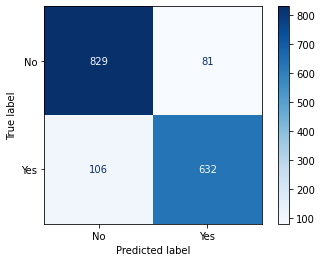

In [ ]:
# Examine the evaluation results on testing data: confusion_matrix (1 point)
plot_confusion_matrix(model_mlp1, predictors_test_BartRider, target_test_BartRider, cmap=plt.cm.Blues, values_format='d')

In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score (1 point)
print(classification_report(target_test_BartRider, prediction_on_test_BartRider))

              precision    recall  f1-score   support

          No       0.89      0.91      0.90       910
         Yes       0.89      0.86      0.87       738

    accuracy                           0.89      1648
   macro avg       0.89      0.88      0.88      1648
weighted avg       0.89      0.89      0.89      1648



### 4.SVM for classification (6 points)

In [ ]:
# Build a SVM model with C=1 (2 points)
model_svm1 = SVC()
model_svm1.fit(predictors_train_BartRider, target_train_BartRider )

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Make predictions on testing data (1 point)
prediction_on_test_BartRider = model_svm1.predict(predictors_test_BartRider)

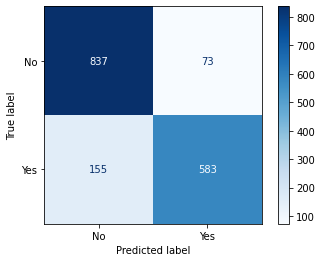

In [ ]:
# Examine the evaluation results on testing data: confusion_matrix (1 point)
plot_confusion_matrix(model_svm1, predictors_test_BartRider, target_test_BartRider, cmap=plt.cm.Blues, values_format='d')

In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score (1 point)
print(classification_report(target_test_BartRider, prediction_on_test_BartRider))

              precision    recall  f1-score   support

          No       0.84      0.92      0.88       910
         Yes       0.89      0.79      0.84       738

    accuracy                           0.86      1648
   macro avg       0.87      0.85      0.86      1648
weighted avg       0.86      0.86      0.86      1648



Q1. Which model has better performance, SVM or MLP? (1 points)<br>
<br>
The MLP provides a better overall performance. The MLP overall accuracy is 0.89 while the SVM has an accuracy of 0.86. Therefore, the MLP has better performance.

## Part 2. Numeric Prediction with Game Sale data <br>
Video games are a billion-dollar business and have been for many years. In 2016, the video game market in the United States was valued at 17.68 billion U.S. dollars. That same year U.S. consumers were said to spend roughly double the amount on gaming content, hardware and accessories. What is important is that the first generation of gamers is now grown up with significant spending power; therefore, despite high penetration rates among kids, video games can no longer be considered solely a child's play. In fact, it was found that video gaming is gaining on popularity among the seniors in the United States.<br>
<br>
This data provides video sales information together with game scores and ratings. Our task is to predict game sales by given the information of each game.
<br><br>
VARIABLE DESCRIPTIONS:<br>
<br>
Name: Game name<br>
Platform: Platform of the games release (i.e. PC,PS4, etc.)<br>
Genre: Genre of the game<br>
Global_Sales: Total worldwide sales (in millions)<br>
Critic_Score: Aggregate score compiled by Metacritic staff<br>
Critic_Count: The number of critics used in coming up with the Critic_score <br>
User_Score: Score by Metacritic's subscribers<br>
User_Count: Number of users who gave the user_score<br>
Rating: The ESRB ratings<br>
<br>
**Target variable: Global_Sales**

### 1.Upload and clean data (1 point)

In [ ]:
# Upload data
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving sales.csv to sales.csv
User uploaded file "sales.csv" with length 425947 bytes


In [ ]:
# Import libraries
! pip install regressors
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import linear_model
from regressors import stats
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Read data
Sales = pd.read_csv('sales.csv')
Sales

,Name,Platform,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,The Legend of Zelda: Twilight Princess,Wii,Action,7.15,95,73,89,1658,T
1,Super Smash Bros. Melee,GC,Fighting,7.07,92,38,90,568,T
2,Medal of Honor: Frontline,PS2,Shooter,6.83,88,29,84,135,T
3,Uncharted 3: Drake's Deception,PS3,Action,6.74,92,97,82,3712,T
4,Uncharted 2: Among Thieves,PS3,Action,6.66,96,105,87,5187,T
...,...,...,...,...,...,...,...,...,...
6937,Act of Aggression,PC,Strategy,0.01,71,37,70,93,missing
6938,Root Letter,PS4,Adventure,0.01,69,13,74,11,missing
6939,Colin McRae Rally 04,PC,Racing,0.01,87,6,71,44,missing
6940,Prison Architect,XOne,Action,0.01,74,13,66,7,missing


In [ ]:
# Examine the number of rows and cols
Sales.shape

(6942, 9)

In [ ]:
# Drop (remove) the Name column
Sales = Sales.drop(['Name'],axis=1)

**Q2. Explain why we should remove the name column? (1 point)**<br>
<br>
The name column does not provide any useful data that helps predict the target variable

In [ ]:
# Examine variable type
Sales.dtypes

Platform         object
Genre            object
Global_Sales    float64
Critic_Score      int64
Critic_Count      int64
User_Score        int64
User_Count        int64
Rating           object
dtype: object

In [ ]:
# Change categorical variables to "category"
Sales['Platform'] = Sales['Platform'].astype('category')
Sales['Genre'] = Sales['Genre'].astype('category')
Sales['Rating'] = Sales['Rating'].astype('category')

In [ ]:
# Examine variable type again
Sales.dtypes

Platform        category
Genre           category
Global_Sales     float64
Critic_Score       int64
Critic_Count       int64
User_Score         int64
User_Count         int64
Rating          category
dtype: object

### 2.Data partitioning and inspection code (7 points)

In [ ]:
# Create dummy variables for Platform, Genre, and Rating	(2 points)
Sales = pd.get_dummies(Sales, columns=['Platform','Genre','Rating'], drop_first=True)
Sales

,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_E10+,Rating_M,Rating_T,Rating_missing
0,7.15,95,73,89,1658,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,7.07,92,38,90,568,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,6.83,88,29,84,135,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,6.74,92,97,82,3712,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,6.66,96,105,87,5187,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6937,0.01,71,37,70,93,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
6938,0.01,69,13,74,11,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6939,0.01,87,6,71,44,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
6940,0.01,74,13,66,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Partition the data to predictors_train, predictors_test, target_train, and target_test. Set test_size=0.3 and random_state=0. (3 points)

target = Sales['Global_Sales']
predictors = Sales.drop(['Global_Sales'],axis=1)
predictors_train_Sales, predictors_test_Sales, target_train_Sales, target_test_Sales = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train_Sales.shape, predictors_test_Sales.shape, target_train_Sales.shape, target_test_Sales.shape)


(4859, 35) (2083, 35) (4859,) (2083,)


Text(0.5, 1.0, 'Histogram of Global Sales in the training data set')

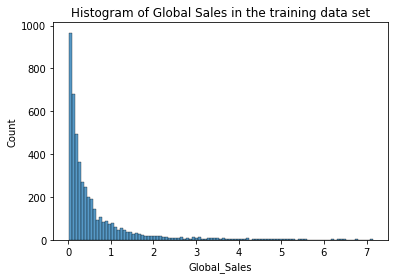

In [ ]:
# Examine the distribution of target variable for training data set (using the histplot function). (1 point)
snsplot = sns.histplot(data = target_train_Sales)
snsplot.set_title("Histogram of Global Sales in the training data set")

Text(0.5, 1.0, 'Histogram of Global Sales in the testing data set')

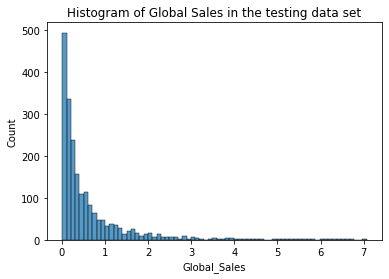

In [ ]:
# Examine the distribution of target variable for testing data set (using the histplot function). (1 point)
snsplot = sns.histplot(data = target_test_Sales)
snsplot.set_title("Histogram of Global Sales in the testing data set")

### 3.Multiple Linear Regression model for predicting Global_Sales value. (11 points)

In [ ]:
# Build a multiple linear regression model with all predictors (2 points)
model1 = linear_model.LinearRegression()
model1.fit(predictors_train_Sales, target_train_Sales)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Show the linear regression model summary (1 point)
predictor_names = predictors_train_Sales.columns.values
stats.summary(model1, predictors_train_Sales, target_train_Sales, predictor_names)

Residuals:
    Min     1Q  Median      3Q     Max
-5.9483 -0.189  0.1399  0.4107  3.8984


Coefficients:
                    Estimate  Std. Error  t value   p value
_intercept         -0.609791    0.082332  -7.4065  0.000000
Critic_Score        0.019093    0.000760  25.1327  0.000000
Critic_Count        0.013488    0.000650  20.7482  0.000000
User_Score         -0.006056    0.000693  -8.7388  0.000000
User_Count          0.000423    0.000022  19.3125  0.000000
Platform_DC        -0.197575    0.267270  -0.7392  0.459801
Platform_DS         0.233791    0.060094   3.8904  0.000101
Platform_GBA        0.157438    0.074952   2.1005  0.035736
Platform_GC         0.007615    0.066371   0.1147  0.908657
Platform_PC        -0.549960    0.056243  -9.7783  0.000000
Platform_PS         0.840254    0.090005   9.3356  0.000000
Platform_PS2        0.361549    0.046294   7.8098  0.000000
Platform_PS3        0.204838    0.051392   3.9858  0.000068
Platform_PS4       -0.028770    0.074552  -0.3859  0.69

Q3. If Critic_Score is increased by 1 (and all the other variable values are held constant), Global_Sales will increase __?__ millions. (1 point)<br>

<br>

Global_Sales will increase 0.019093 millions.

Q4. If Critic_Count is increased by 1 (and all the other variable values are held constant), Global_Sales will increase __?__ millions. (1 point)<br>
<br>
Global_Sales will increase 0.013488 millions

Q5. Are User_Score and User_Count important for predicting Global_Sales, and why? hint: using the p-value to determine the importance. (2 points)<br>
<br>
Yes, both their p-values are 0.00 which indicates that it is statistically significant for predicting Global_Sales.

Q6. What is the value of Multiple R-squared? Interpret the meaning of Multiple R-squared value. (2 points)<br>
<br>
The value of R-Squared is 0.30728. The R-Squared value is a statistical measure of how close the data are to the fitted regression line. The higher R-squared value indicates a better fit for the model.

In [ ]:
# Make predictions on testing data (1 point)
prediction_on_test_Sales = model1.predict(predictors_test_Sales)

In [ ]:
# Examine the evaluation results on testing data: MAE and RMSE (1 point)
MAE = mean_absolute_error(target_test_Sales, prediction_on_test_Sales)
RMSE = mean_squared_error(target_test_Sales, prediction_on_test_Sales, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 0.4945490418627451
RMSE: 0.7793835143830433


### 4.Neural Network for numeric prediction (5 points)

In [ ]:
# Apply minmax normalization on predictors and partition the data.
min_max_scaler = preprocessing.MinMaxScaler()
predictors_normalized = pd.DataFrame(min_max_scaler.fit_transform(predictors))
predictors_normalized.columns = predictors.columns
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(4859, 35) (2083, 35) (4859,) (2083,)


In [ ]:
# Build a MLP model with your choice of hidden layers and hidden nodes. Your MLP model need to have a better performance than the multiple linear regression model. (3 point)
model_mlp2 = MLPRegressor(hidden_layer_sizes=(8, 4, 4), random_state=1)
model_mlp2.fit(predictors_train_Sales, target_train_Sales)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(8, 4, 4), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
# Make predictions on testing data (1 point)
prediction_on_test_Sales = model_mlp2.predict(predictors_test_Sales)

In [ ]:
# Examine the evaluation results on testing data: MAE and RMSE (1 point)
MAE = mean_absolute_error(target_test_Sales, prediction_on_test_Sales)
RMSE = mean_squared_error(target_test_Sales, prediction_on_test_Sales, squared=False)
print("MAE", MAE)
print("RMSE", RMSE)

MAE 0.4353034081911261
RMSE 0.6993902188073282


### 5.SVM for numeric prediction (8 points)

In [ ]:
# Build a SVM model with C = 100. (2 points)
model_svm2 = SVR(C=100)
model_svm2.fit(predictors_train_Sales, target_train_Sales)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Make predictions on testing data (1 point)
prediction_on_test_Sales = model_svm2.predict(predictors_test_Sales)

In [ ]:
# Examine the evaluation results on testing data: MAE and RMSE (1 point)
MAE = mean_absolute_error(target_test_Sales, prediction_on_test_Sales)
RMSE = mean_squared_error(target_test_Sales, prediction_on_test_Sales, squared=False)
print("MAE", MAE)
print("RMSE", RMSE)

MAE 0.4375045612960777
RMSE 0.8774207801273528


Q7. Assume that you will lose each dollar your model's prediction misses due to an over-estimation or under-estimation. Which evaluation metric you should use? (1 point)<br>
Based on your choice of evaluation metric, which model has better performance, SVM or MLP? (1 point)<br>
<br>
MAE
<br>
<br>
The MLP has better MAE performance               (MAE 0.4353034081911261)

Q8. Assume that the penalty for an erroneous prediction increases with the difference between the actual and predicted values. Which evaluation metric you should use? (1 point)<br>
Based on your choice of evaluation metric, which model has better performance, SVM or MLP? (1 point)<br>
<br>
RMSE
<br>
<br>
The MLP has better performance                (RMSE 0.6993902188073282)

***Download the html file and submit to BeachBoard***<br>
<br>
1.   ***Download the IS470_homework3.ipynb file***
2.   ***Upload the IS470_homework3.ipynb file***
3.   ***Run the code below to generate a html file***
4.   ***Download the html file and submit to BeachBoard***

In [ ]:
!jupyter nbconvert --to html IS470_homework3.ipynb

[NbConvertApp] Converting notebook IS470_homework3.ipynb to html
[NbConvertApp] Writing 420653 bytes to IS470_homework3.html
